### Import scapy and read pcap file

In [3]:
from scapy.all import *
from collections import Counter
import scapy.utils as utils
import scapy.layers.inet as inet
import scapy.layers.inet6 as inet6

pcapemail = "bahandata.pcapng"
pkts =  utils.rdpcap(pcapemail)

### Packet List Overview

In [ ]:
# Packet List Information

print(pkts)
print(type(pkts))
print(len(pkts))

<bahandata.pcapng: TCP:3196 UDP:13592 ICMP:502 Other:4643>
<class 'scapy.plist.PacketList'>
21933


### Packet Summary with index

In [ ]:
pkts.show()

0000 Ether / IP / TCP 192.168.110.10:1152 > 80.237.133.136:http S
0001 Ether / IP / TCP 80.237.133.136:http > 192.168.110.10:1152 SA
0002 Ether / IP / TCP 192.168.110.10:1152 > 80.237.133.136:http A
0003 Ether / IP / TCP 192.168.110.10:1152 > 80.237.133.136:http PA / Raw
0004 Ether / IP / TCP 80.237.133.136:http > 192.168.110.10:1152 A / Padding
0005 Ether / IP / TCP 80.237.133.136:http > 192.168.110.10:1152 A / Raw
0006 Ether / IP / TCP 80.237.133.136:http > 192.168.110.10:1152 PA / Raw
0007 Ether / IP / TCP 192.168.110.10:1152 > 80.237.133.136:http A
0008 Ether / IP / TCP 80.237.133.136:http > 192.168.110.10:1152 FA / Padding
0009 Ether / IP / TCP 192.168.110.10:1152 > 80.237.133.136:http A
0010 Ether / IP / TCP 192.168.110.10:1152 > 80.237.133.136:http FA
0011 Ether / IP / TCP 80.237.133.136:http > 192.168.110.10:1152 A / Padding
0012 Ether / IP / TCP 192.168.110.10:1154 > 212.144.254.123:3128 S
0013 Ether / IP / TCP 192.168.110.10:1154 > 212.144.254.123:3128 S
0014 Ether / IP / TCP

### List of IP Source in the packet list

In [ ]:
ips = set()

for pkt in pkts:
  if inet.IP in pkt:
    try:
      ips.add(pkt[inet.IP].src)
    except:
       pass

ips

{'0.0.0.0',
 '1.1.1.1',
 '141.41.241.70',
 '141.41.39.187',
 '148.251.154.36',
 '156.154.65.154',
 '172.16.23.2',
 '172.217.40.76',
 '173.194.169.104',
 '178.4.19.82',
 '178.62.68.79',
 '185.176.27.242',
 '185.244.25.191',
 '192.168.10.1',
 '192.168.110.10',
 '192.168.110.9',
 '192.168.120.1',
 '192.168.120.21',
 '192.168.120.22',
 '192.168.120.24',
 '192.168.120.25',
 '192.168.120.33',
 '192.168.121.10',
 '192.168.121.2',
 '192.168.121.253',
 '192.168.121.254',
 '192.168.121.4',
 '192.168.121.40',
 '192.168.121.42',
 '192.168.121.5',
 '192.168.127.1',
 '192.168.127.2',
 '192.168.2.1',
 '192.168.2.102',
 '192.168.20.1',
 '192.168.255.1',
 '192.168.255.14',
 '192.168.255.15',
 '192.168.30.1',
 '192.168.47.1',
 '192.168.7.1',
 '192.168.7.12',
 '192.168.7.26',
 '192.168.7.5',
 '192.168.90.10',
 '192.31.80.30',
 '192.53.103.103',
 '192.53.103.104',
 '192.53.103.108',
 '192.54.112.30',
 '193.0.9.7',
 '193.24.227.1',
 '193.24.227.10',
 '193.24.227.12',
 '193.24.227.225',
 '193.24.227.230',
 

### IP with biggest network usage

In [25]:
from prettytable import PrettyTable

srcIP = []
srcMAC = []

for pkt in pkts:
  if inet.IP in pkt:
    try:
      srcIP.append(pkt[inet.IP].src)
      srcMAC.append(pkt['Ethernet'].src)
    except:
      pass

countIP = Counter()
for ip in srcIP:
  countIP[ip] += 1

tableIP = PrettyTable(["IP", "Count"])

for ip, count in countIP.most_common():
  tableIP.add_row([ip, count])

tableIP[:5]

IP,Count
192.168.7.26,3904
84.146.135.221,3261
217.0.5.215,3215
80.154.108.228,623
193.24.227.230,376


### MAC Address with biggest network usage

In [ ]:
countMAC = Counter()
for address in srcMAC:
  countMAC[address] += 1

tableMAC = PrettyTable(["Mac Address", "Count"])

for address, count in countMAC.most_common():
  tableMAC.add_row([address, count])

tableMAC[:5]

Mac Address,Count
74:81:14:81:c2:d4,3904
c8:0e:14:7e:33:a0,3261
3c:61:04:50:d2:1a,3225
b4:0c:25:05:8e:10,623
24:b6:57:92:f0:1b,431


### Networks Transmission over Time

In [37]:
from datetime import datetime
import plotly
import pandas as pd

pktBytes = []
pktTimes = []

for pkt in pkts:
  if inet.IP in pkt:
    if pkt[inet.IP].len != 0:
      try:
        pktBytes.append(pkt[inet.IP].len)
        pktTime = datetime.fromtimestamp(int(pkt.time))
        pktTimes.append(pktTime.strftime("%Y-%m-%d %H:%M:%S.%f"))
      except:
        print("error")
        break

bytes = pd.Series(pktBytes).astype(int)
times = pd.to_datetime(pd.Series(pktTimes).astype(str))

df = pd.DataFrame({"Bytes": bytes, "Times": times})
df = df.set_index('Times')

df

,Bytes
Times,
2014-01-21 18:28:16,52
2014-01-21 18:28:16,52
2014-01-21 18:28:16,40
2014-01-21 18:28:16,351
2014-01-21 18:28:16,40
...,...
2020-01-22 20:59:02,84
2020-01-22 20:59:02,84
2020-01-22 20:59:02,84


### Network Transmission over Months and Years

In [38]:
df2 = df.resample('M').sum()
df2.index = pd.to_datetime(df2.index).strftime('%Y-%m')
df2 = df2[df2['Bytes'] != 0]

df2

,Bytes
Times,
2014-01,6070
2015-04,3601
2016-04,23458
2016-05,21697
2017-03,49067
2017-06,305458
2017-11,2877410
2018-02,31116
2018-08,17380


### Network Transmission over Years Visualization

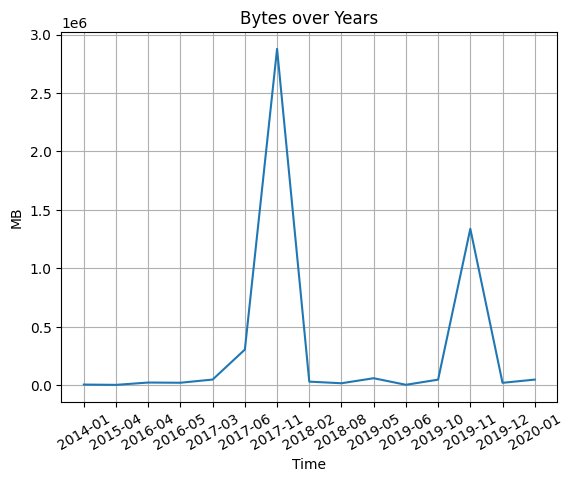

In [39]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(df2.index, df2['Bytes'])
plt.title("Bytes over Years")
plt.ylabel("MB")
plt.xlabel("Time")
plt.grid(True)
plt.xticks(rotation=30)
plt.show()

### Network Transmissions over Hours Visualization

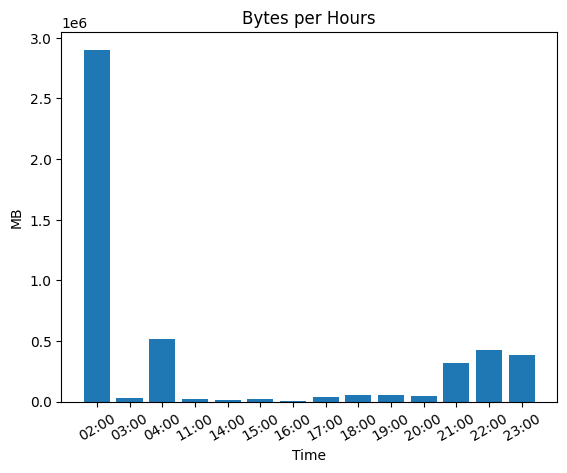

In [40]:
df3 = df.resample('H').sum()
df3 = df3[df3['Bytes'] != 0]
df3.index = pd.to_datetime(df3.index).strftime('%H:%M')
df3 = df3.groupby(by=df3.index).sum()

plt.bar(df3.index, df3['Bytes'])
plt.title("Bytes per Hours")
plt.ylabel("MB")
plt.xlabel("Time")
plt.xticks(rotation=30)
plt.show()

### Packets with Reset Flags

In [23]:
rstPkt = []
lsproto = []

for pkt in pkts:
  if inet.TCP in pkt and pkt[inet.TCP].flags == 'R':
      rstPkt.append(pkt)

for pkt in rstPkt:
  print(pkt.summary())


Ether / Dot1Q / IPv6 / TCP 2003:51:6012:121::2:ssh > 2003:51:6012:110::b15:22:60892 R
Ether / Dot1Q / IPv6 / TCP 2003:51:6012:121::2:ssh > 2003:51:6012:110::b15:22:60892 R
Ether / Dot1Q / IPv6 / TCP 2003:51:6012:121::2:ssh > 2003:51:6012:110::b15:22:60892 R
Ether / Dot1Q / IPv6 / TCP 2003:51:6012:121::2:ssh > 2003:51:6012:110::b15:22:60892 R
Ether / IPv6 / TCP 2003:50:aa0e:2f00:ba27:ebff:fec9:1637:48967 > 2003:51:6012:110::15:smtp R
Ether / IPv6 / TCP 2003:50:aa0e:2f00:ba27:ebff:fec9:1637:45457 > 2003:51:6012:110::15:smtp R
Ether / IPv6 / TCP 2003:50:aa0e:2f00:ba27:ebff:fec9:1637:51907 > 2003:51:6012:110::15:smtp R
Ether / IPv6 / TCP 2003:50:aa0e:2f00:ba27:ebff:fec9:1637:58598 > 2003:51:6012:110::15:smtp R
Ether / IPv6 / TCP 2003:50:aa0e:2f00:ba27:ebff:fec9:1637:35235 > 2003:51:6012:110::15:smtp R
Ether / IPv6 / TCP 2003:50:aa0e:2f00:ba27:ebff:fec9:1637:53480 > 2003:51:6012:110::15:smtp R
Ether / IPv6 / TCP 2003:50:aa0e:2f00:ba27:ebff:fec9:1637:46732 > 2003:51:6012:110::15:smtp R
Ether

### Count of Port with Reset Flags

In [10]:
countPort = Counter()

for pkt in rstPkt:
  countPort[pkt[inet.TCP].sport] += 1
  countPort[pkt[inet.TCP].dport] += 1

tablePort = PrettyTable(["Protocol/PORT", "Count"])

for proto, count in countPort.most_common():
  tablePort.add_row([proto, count])

tablePort[:5]

Protocol/PORT,Count
25,16
443,5
22,4
60892,4
179,4


In [26]:
import socket

def getProto(port):
  try:
    return socket.getservbyport(port)
  except:
    return port

countProtocol = Counter()

for pkt in rstPkt:
  countProtocol[pkt[inet.TCP].sport] += 1
  countProtocol[pkt[inet.TCP].dport] += 1

tablePort = PrettyTable(["Protocol/PORT", "Count"])

for proto, count in countProtocol.most_common():
  tablePort.add_row([getProto(proto), count])

tablePort[:5]

Protocol/PORT,Count
smtp,16
https,5
ssh,4
60892,4
bgp,4


### SYN Flood Analysis

In [42]:
for pkt in pkts:
  if pkt.haslayer(inet.TCP):
    if pkt[inet.TCP].dport == 25:
      print(datetime.fromtimestamp(int(pkt.time)).strftime('Hour=%d - %H:%M:%S'), pkt.summary())

Hour=10 - 17:12:18 Ether / IP / TCP 192.168.110.9:45271 > 80.154.108.237:smtp S
Hour=10 - 17:12:18 Ether / IP / TCP 192.168.110.9:45271 > 80.154.108.237:smtp A
Hour=10 - 17:12:18 Ether / IP / TCP 192.168.110.9:45271 > 80.154.108.237:smtp A
Hour=10 - 17:12:18 Ether / IP / TCP 192.168.110.9:45271 > 80.154.108.237:smtp PA / Raw
Hour=10 - 17:12:18 Ether / IP / TCP 192.168.110.9:45271 > 80.154.108.237:smtp PA / Raw
Hour=10 - 17:12:18 Ether / IP / TCP 192.168.110.9:45271 > 80.154.108.237:smtp PA / Raw
Hour=10 - 17:12:18 Ether / IP / TCP 192.168.110.9:45271 > 80.154.108.237:smtp PA / Raw
Hour=10 - 17:12:18 Ether / IP / TCP 192.168.110.9:45271 > 80.154.108.237:smtp A / Raw
Hour=10 - 17:12:18 Ether / IP / TCP 192.168.110.9:45271 > 80.154.108.237:smtp PA / Raw
Hour=10 - 17:12:18 Ether / IP / TCP 192.168.110.9:45271 > 80.154.108.237:smtp PA / Raw
Hour=10 - 17:12:18 Ether / IP / TCP 192.168.110.9:45271 > 80.154.108.237:smtp FA
Hour=25 - 20:33:31 Ether / IPv6 / TCP 2003:50:aa0e:2f00:ba27:ebff:fec9:

### HTTP Analysis

In [65]:
http = []
for pkt in pkts:
  if pkt.haslayer(inet.TCP) and pkt[inet.TCP].dport == 443:
    http.append(pkt)

for pkt in http:
  if pkt.haslayer(inet.IP) and pkt[inet.TCP].dport == 443:
    if pkt[inet6.IP].src == '216.66.80.30' and pkt[inet6.IP].dst == '193.24.227.12':
      print(pkt.summary())


Ether / IP / IPv6 / TCP 2a01:598:a000:4fcf:9050:995a:36a8:d0f0:60074 > 2001:470:765b:0:1c6e:18ae:ddb4:3bc1:https S
Ether / IP / IPv6 / TCP 2a01:598:a000:4fcf:9050:995a:36a8:d0f0:60074 > 2001:470:765b:0:1c6e:18ae:ddb4:3bc1:https A
Ether / IP / IPv6 / TCP 2a01:598:a000:4fcf:9050:995a:36a8:d0f0:60074 > 2001:470:765b:0:1c6e:18ae:ddb4:3bc1:https PA / Raw
Ether / IP / IPv6 / TCP 2a01:598:a000:4fcf:9050:995a:36a8:d0f0:60074 > 2001:470:765b:0:1c6e:18ae:ddb4:3bc1:https A
Ether / IP / IPv6 / TCP 2a01:598:a000:4fcf:9050:995a:36a8:d0f0:60074 > 2001:470:765b:0:1c6e:18ae:ddb4:3bc1:https A
Ether / IP / IPv6 / TCP 2a01:598:a000:4fcf:9050:995a:36a8:d0f0:60074 > 2001:470:765b:0:1c6e:18ae:ddb4:3bc1:https A
Ether / IP / IPv6 / TCP 2a01:598:a000:4fcf:9050:995a:36a8:d0f0:60074 > 2001:470:765b:0:1c6e:18ae:ddb4:3bc1:https PA / Raw
Ether / IP / IPv6 / TCP 2a01:598:a000:4fcf:9050:995a:36a8:d0f0:60074 > 2001:470:765b:0:1c6e:18ae:ddb4:3bc1:https A
Ether / IP / IPv6 / TCP 2a01:598:a000:4fcf:9050:995a:36a8:d0f0:600